# Weather data prediction using KNeighborsClassifier

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#reading the data set
df = pd.read_csv('weatherHistory.csv')
#displaying head
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
#getting info of data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [ ]:
#checking for null values
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [ ]:
#giving null values arbitary value as 0
df1 = df.fillna(value = 0)
df1.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [ ]:
#describing the data set mean q1 q2 q3 min max count frequency
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [ ]:
#droppng the play coloumn to make it output
X = df1.drop('Summary', axis = 1)
X.head()

,Formatted Date,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
# Split the 'Formatted Date' column into separate columns
split_data = X['Formatted Date'].str.split(' ', 2, expand=True)
X['Year'] = pd.to_datetime(split_data[0]).dt.year
X['Month'] = pd.to_datetime(split_data[0]).dt.month
X['Day'] = pd.to_datetime(split_data[0]).dt.day
X['Time'] = split_data[1]

# Extract hours, minutes, and seconds from the 'Time' column
X['Hour'] = pd.to_datetime(split_data[1]).dt.hour
X['Minute'] = pd.to_datetime(split_data[1]).dt.minute
X['Second'] = pd.to_datetime(split_data[1]).dt.second
X.head()

<ipython-input-31-3ef04ae2cef6>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  split_data = X['Formatted Date'].str.split(' ', 2, expand=True)


,Formatted Date,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year,Month,Day,Time,Hour,Minute,Second
0,2006-04-01 00:00:00.000 +0200,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,4,1,00:00:00.000,0,0,0
1,2006-04-01 01:00:00.000 +0200,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,4,1,01:00:00.000,1,0,0
2,2006-04-01 02:00:00.000 +0200,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,4,1,02:00:00.000,2,0,0
3,2006-04-01 03:00:00.000 +0200,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,4,1,03:00:00.000,3,0,0
4,2006-04-01 04:00:00.000 +0200,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,4,1,04:00:00.000,4,0,0


In [ ]:
data_coloumns = ['Precip Type','Daily Summary','Formatted Date','Time']
X = X.drop(data_coloumns, axis = 1)
X.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Year,Month,Day,Hour,Minute,Second
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,2006,4,1,0,0,0
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,2006,4,1,1,0,0
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,2006,4,1,2,0,0
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,2006,4,1,3,0,0
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,2006,4,1,4,0,0


In [ ]:
#making y
y = df[['Summary']]
y.head()

,Summary
0,Partly Cloudy
1,Partly Cloudy
2,Mostly Cloudy
3,Partly Cloudy
4,Mostly Cloudy


In [ ]:
#converting y into binary
le =LabelEncoder()
y_e = le.fit_transform(y)
y_e.shape

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(96453,)

In [ ]:
#making test train split data
X_train , X_test , y_train , y_test = train_test_split(X , y_e , random_state = 24 , test_size = 0.4)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((57871, 14), (38582, 14), (57871,), (38582,))

In [ ]:
#making model
model = KNeighborsClassifier(n_neighbors = 5)
model = model.fit(X_train , y_train)
model

KNeighborsClassifier()

In [ ]:
#predicting
y_predict = model.predict(X_test)
y_predict

array([17, 17, 19, ..., 17, 17, 17])

In [ ]:
#accuracy score
print('accuracy_score : ' , accuracy_score(y_test , y_predict))

accuracy_score :  0.489191851122285


In [ ]:
#confusion matrix
con_mat = confusion_matrix(y_test , y_predict , labels = range(10))
con_mat

array([[   4,    0,    0,    1,    1,    1,    5,    0,    0,    1],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    8,    0,    1,    0,    0,    0,    0,    0],
       [   1,    0,    1,   70,   31,   33,    0,    0,    0,    0],
       [   1,    0,    1,   30,   80,    9,    2,    0,    0,    0],
       [   0,    1,    0,   34,   10,   50,    2,    0,    0,    0],
       [   1,    0,    0,    5,    0,    2, 1687,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    1,    0,    2,    0],
       [   0,    0,    0,    0,    0,    0,    7,    0,    0,    1]])

<Axes: >

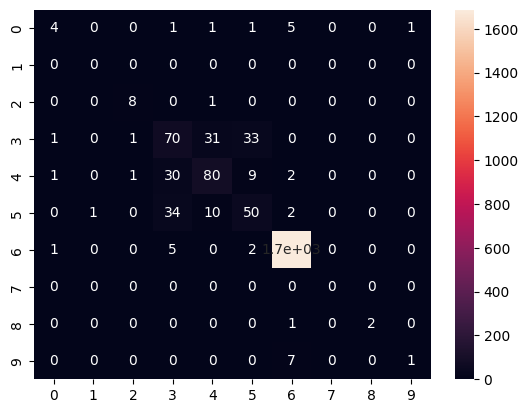

In [ ]:
#heat map
import seaborn as sns
sns.heatmap(con_mat , annot = True)